## Загрузка данных
#### Данные беру из Churn_modeling.zip

# Colab

https://drive.google.com/file/d/1ilb0iIuToOiuFSQpfWQvTCG4jl8I6hOx/view?usp=sharing

In [1]:
! gdown --id 1ilb0iIuToOiuFSQpfWQvTCG4jl8I6hOx

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


! unzip /content/churn_modeling.zip -d /content/churn_modeling/

In [9]:
! unzip / content / churn_modeling.zip -d / content / churn_modeling /

"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [1]:
import pandas as pd

In [8]:
df = pd.read_csv('/content/churn_modeling/Churn_Modelling.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/churn_modeling/Churn_Modelling.csv'

In [ ]:
df.head()

## Pycharm

In [5]:
from zipfile import ZipFile

with ZipFile(r'C:\PyCharm\Python\Data_Science_GM\7.Classification\churn_modeling.zip', 'r') as zf:
    zf.extractall()

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Обучающая, валидационная и тестовая выборки

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train, test = train_test_split(df, random_state=42, train_size=0.6, stratify=df.Exited)

In [6]:
val, test = train_test_split(test, random_state=42, train_size=0.5, stratify=test.Exited)

проверка разбивки

In [7]:
val.Exited.mean(), test.Exited.mean(), train.Exited.mean()

(0.204, 0.2035, 0.20366666666666666)

## Human learning

In [8]:
train['age_group'] = pd.cut(train.Age, [0, 31, 35, 40, 46, float('inf')])

In [9]:
model = train.groupby(['NumOfProducts', 'age_group']).Exited.mean().reset_index()

In [10]:
model = model.rename({'Exited': 'score_prod_age'}, axis=1)

In [11]:
train = train.merge(model, how='left', on=['NumOfProducts', 'age_group'])

In [12]:
test['age_group'] = pd.cut(test.Age, [0, 31, 35, 40, 46, float('inf')])

In [13]:
test = test.merge(model, how='left', on=['NumOfProducts', 'age_group'])

## Machine learning

In [14]:
# Для Colab
# ! pip install catboost

In [15]:
from catboost import CatBoostClassifier

In [16]:
X = ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
     'IsActiveMember', 'EstimatedSalary', 'Geography', 'Gender']
cat_features = ['Geography', 'Gender']

y = ['Exited']

In [17]:
from catboost import Pool

train_data = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features
                  )

valid_data = Pool(data=val[X],
                  label=val[y],
                  cat_features=cat_features
                  )

In [18]:
params = {'verbose': 100,
          'random_seed': 42,
          'learning_rate': 0.01}

In [19]:
model = CatBoostClassifier(**params)

In [20]:
model.fit(train_data, eval_set=valid_data)

0:	learn: 0.6848575	test: 0.6849145	best: 0.6849145 (0)	total: 188ms	remaining: 3m 8s
100:	learn: 0.3908412	test: 0.3894043	best: 0.3894043 (100)	total: 2.75s	remaining: 24.5s
200:	learn: 0.3457312	test: 0.3445503	best: 0.3445503 (200)	total: 5.5s	remaining: 21.8s
300:	learn: 0.3288071	test: 0.3307084	best: 0.3307084 (300)	total: 7.93s	remaining: 18.4s
400:	learn: 0.3192987	test: 0.3252459	best: 0.3252459 (400)	total: 10.3s	remaining: 15.3s
500:	learn: 0.3120470	test: 0.3221057	best: 0.3221057 (500)	total: 12.5s	remaining: 12.5s
600:	learn: 0.3054735	test: 0.3204300	best: 0.3204300 (600)	total: 14.8s	remaining: 9.86s
700:	learn: 0.2997053	test: 0.3192377	best: 0.3192377 (700)	total: 17.2s	remaining: 7.33s
800:	learn: 0.2946934	test: 0.3188206	best: 0.3187917 (794)	total: 19.8s	remaining: 4.92s
900:	learn: 0.2890177	test: 0.3185731	best: 0.3185731 (900)	total: 23s	remaining: 2.52s
999:	learn: 0.2831978	test: 0.3186396	best: 0.3185004 (978)	total: 26.1s	remaining: 0us

bestTest = 0.31850

In [21]:
test['score_catboost'] = model.predict_proba(test[X])[0:, 1]

## Скор и пороги
В данном ноутбуке 2 скора: первый Hl - 2 фичи (score_prod_age), а второй catboost - все фичи (score_catboost)
Чем выше скор, тем более человек склонен к оттоку
Скор всегда нормированый, то есть от 0 до 1
Для того чтобы понять отточный клиент или нет, нужно разделить клиентов на классы, а для этого нужно придумать какой-то порог, например: я считаю, что если скор клиента > 0.5 то человек уйдёт в отток


In [22]:
test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_group,score_prod_age,score_catboost
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,"(0.0, 31.0]",0.110764,0.131844
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,"(31.0, 35.0]",0.140449,0.074020
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,"(35.0, 40.0]",0.209337,0.186876
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,"(31.0, 35.0]",0.140449,0.087403
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,"(31.0, 35.0]",0.140449,0.056658


In [23]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.style.use('seaborn-v0_8-colorblind')

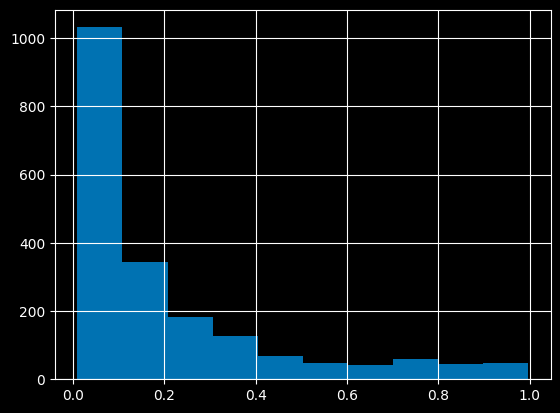

In [24]:
test.score_catboost.hist();

Только 20% склонны к оттоку

In [25]:
train.Exited.mean()

0.20366666666666666

Посмотрим на пользователей, вероятность оттока которых > 0.5
Для того, чтобы Pandas выдал нам 0 и 1, а не False и True, нужно умножить на 1

In [26]:
test['y_pred'] = (test['score_catboost'] > 0.5) * 1

In [27]:
test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_group,score_prod_age,score_catboost,y_pred
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,"(0.0, 31.0]",0.110764,0.131844,0
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,"(31.0, 35.0]",0.140449,0.074020,0
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,"(35.0, 40.0]",0.209337,0.186876,0
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,"(31.0, 35.0]",0.140449,0.087403,0
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,"(31.0, 35.0]",0.140449,0.056658,0


In [29]:
test.y_pred.mean()

0.1225

In [30]:
from sklearn.metrics import confusion_matrix

#### Анализируя матрицу путаницы (ошибок) получаем:
В целом в большинстве случаев модель правильно определила отточных и неотточных клиентов.
1537 клиентов не было отточными и модель предсказала, что они не отточные TN - Верно
218 клиентов были отточные, а модель предскзала, что они не оттчные FN - ошибки
56 клиентов не были отточными, а модель предсказала, что они отточные FP - шибки
189 клиентов были отточными и модель также предсказала, что они отточные - Верно

In [31]:
confusion_matrix(test.Exited, test.y_pred)

array([[1537,   56],
       [ 218,  189]], dtype=int64)

In [32]:
tn, fp, fn, tp = confusion_matrix(test.Exited, test.y_pred).ravel()

In [33]:
tn, fp, fn, tp

(1537, 56, 218, 189)

## Recall (полнота)
recall - процент 1-иц, которые модель определила как 1-цы
На сколько хорошо модель может подстветить отточного клиента (в задаче оттока)

In [34]:
recall = tp / (tp + fn)

In [35]:
recall

0.4643734643734644

Рекол = 0.46 или 46%. То есть если мы покажем модели 100 отточных клиентов, то она распознает только 46

In [36]:
from sklearn.metrics import recall_score

In [37]:
recall_score(test.Exited, test.y_pred)

0.4643734643734644

## Precision (точность)
Показывает ПРОЦЕНТ ПРАВИЛЬНЫХ 1-иц, среди всех предсказанных 1-иц.

In [38]:
precision = tp / (tp + fp)

In [39]:
precision

0.7714285714285715

In [40]:
from sklearn.metrics import precision_score

In [41]:
precision_score(test.Exited, test.y_pred)

0.7714285714285715

## F1
F1 - среднее значине precision и recall.
Существует несколько f мер

In [43]:
f1 = (2 * recall * precision) / (recall + precision)

In [44]:
f1

0.5797546012269938

In [45]:
from sklearn.metrics import f1_score

In [46]:
f1_score(test.Exited, test.y_pred)

0.5797546012269938

## Accuracy (процент правильных ответов)
Accuracy - в скольких процентах случаев модель правильно угадала класс
Не верно отображает суть при дисбалансе классов. Чаще всего дисбаланс классов присутствует.

In [49]:
(test.Exited == test.y_pred).mean()

0.863

In [50]:
(tp + tn) / (tp + tn + fp + fn)

0.863

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(test.Exited, test.y_pred)

0.863

В данном случае имеем дисбаланс классов: 1 класс - 20% и 0 класс - 80%

In [55]:
test.Exited.mean()

0.2035

## Classification report

In [56]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(test.Exited, test.y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
precision, recall, f1, accuracy_score(test.Exited, test.y_pred)

#### Пробелема данных результатов в том, что они были посчитаны для одного порога, а именно 0.5

In [62]:
# test['y_pred'] = (test['score_catboost'] > 0.5) * 1

#### Можно выбрать любой порог.
#### Число порогов для модели = количество уникальных скоров + 1

## Предикт с другим порогом
Возьмём порог 0.4

In [64]:
test['y_pred_new'] = (test['score_catboost'] > 0.4) * 1

In [65]:
test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_group,score_prod_age,score_catboost,y_pred,y_pred_new
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,"(0.0, 31.0]",0.110764,0.131844,0,0
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,"(31.0, 35.0]",0.140449,0.074020,0,0
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,"(35.0, 40.0]",0.209337,0.186876,0,0
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,"(31.0, 35.0]",0.140449,0.087403,0,0
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,"(31.0, 35.0]",0.140449,0.056658,0,0


F1 для порога 0.4

In [66]:
f1_score(test.Exited, test.y_pred_new)

0.6104972375690608

F1 для порога 0.5

In [67]:
f1_score(test.Exited, test.y_pred)

0.5797546012269938

#### Подсчитаем F1 для всех возможных порогов и найдём порог с максимальным F1

Имеем 2000 уникальных скоров, т.к. мы добавляли шум

In [69]:
test.score_catboost.nunique()

2000

Конвертируем np.array в лист
thrs - сокращение threshold (порог)

In [71]:
thrs = list(test.score_catboost.unique())

Первые 20 порогов

In [72]:
thrs[:20]

[0.13184386080460456,
 0.07401954387476312,
 0.186875674742704,
 0.08740349387157287,
 0.056658162909274626,
 0.06161072773132969,
 0.5563161171624524,
 0.20388734500811354,
 0.04555554026765728,
 0.3665912024509706,
 0.05285404501123435,
 0.02389861383169527,
 0.025687510422433397,
 0.16369028198188673,
 0.25392676705939893,
 0.7564224487666255,
 0.018690614421304177,
 0.5052261796760975,
 0.07183857505482741,
 0.03570904305594995]

Посмотрим минимальный порог и добавим 1 дополнительный порог, ниже минимального т.к. Число порогов для модели = количество уникальных скоров + 1

In [73]:
min(thrs)

0.00937121856820433

In [74]:
thrs = [0] + list(test.score_catboost.unique())

In [75]:
min(thrs)

0

In [76]:
len(thrs)

2001

Теперь есть все минимальные пороги, при которых можно посчитать F1

In [87]:
from tqdm.notebook import tqdm

In [93]:
result = []
for thr in tqdm(thrs):
    test['y_pred_new'] = (test['score_catboost'] > thr) * 1
    result.append((thr, f1_score(test.Exited, test.y_pred_new)))

  0%|          | 0/2001 [00:00<?, ?it/s]

In [94]:
result[:20]

[(0, 0.3381803074366431),
 (0.13184386080460456, 0.5536277602523659),
 (0.07401954387476312, 0.47174447174447176),
 (0.186875674742704, 0.5938069216757741),
 (0.08740349387157287, 0.4940239043824701),
 (0.056658162909274626, 0.43680709534368073),
 (0.06161072773132969, 0.44610091743119257),
 (0.5563161171624524, 0.5544871794871795),
 (0.20388734500811354, 0.6096153846153847),
 (0.04555554026765728, 0.40841457157516675),
 (0.3665912024509706, 0.6176084099868594),
 (0.05285404501123435, 0.42741500269832705),
 (0.02389861383169527, 0.3655234657039711),
 (0.025687510422433397, 0.3702010968921389),
 (0.16369028198188673, 0.5795356835769561),
 (0.25392676705939893, 0.6299892125134844),
 (0.7564224487666255, 0.43478260869565216),
 (0.018690614421304177, 0.3532490187527257),
 (0.5052261796760975, 0.576271186440678),
 (0.07183857505482741, 0.4677222898903776)]

In [95]:
max(result)

(0.9973175459581187, 0.0)

In [99]:
t = pd.DataFrame(result, columns=['thr', 'f1'])

In [100]:
t.head()

,thr,f1
0,0.000000,0.338180
1,0.131844,0.553628
2,0.074020,0.471744
3,0.186876,0.593807
4,0.087403,0.494024


In [101]:
t.sort_values('f1', ascending=False)

,thr,f1
640,0.277932,0.636771
623,0.280837,0.636569
1343,0.276637,0.636058
1756,0.331582,0.636025
1228,0.278005,0.635955
...,...,...
238,0.992916,0.019465
315,0.993195,0.014634
180,0.994941,0.009780
1205,0.997245,0.004902


In [104]:
t[t['f1'] == t['f1'].max()]

,thr,f1
640,0.277932,0.636771


#### Проделаем то же самое но для скора рассчитанного HL с 2 фичами, а не catboos`ом со всеми фичами

In [105]:
thrs = [0] + list(test.score_prod_age.unique())

In [106]:
min(thrs)

0

In [107]:
len(thrs)

17

Теперь есть все минимальные пороги, при которых можно посчитать F1

In [108]:
result = []
for thr in tqdm(thrs):
    test['y_pred_new'] = (test['score_prod_age'] > thr) * 1
    result.append((thr, f1_score(test.Exited, test.y_pred_new)))

  0%|          | 0/17 [00:00<?, ?it/s]

In [109]:
result[:20]

[(0, 0.3381803074366431),
 (0.11076443057722309, 0.4838940586972082),
 (0.1404494382022472, 0.5156507413509062),
 (0.20933734939759036, 0.5372233400402414),
 (0.5276073619631901, 0.21888412017167383),
 (0.10864745011086474, 0.45387453874538747),
 (0.028037383177570093, 0.3596608656849621),
 (0.061068702290076333, 0.43132803632236094),
 (0.23636363636363636, 0.5594405594405594),
 (0.033288948069241014, 0.3991995997999),
 (0.3704414587332054, 0.5195936139332366),
 (0.5925925925925926, 0.19340659340659339),
 (0.5714285714285714, 0.20434782608695654),
 (0.75, 0.15765765765765766),
 (0.9636363636363636, 0.057279236276849645),
 (1.0, 0.0),
 (0.8958333333333334, 0.11547344110854503)]

In [111]:
t = pd.DataFrame(result, columns=['thr', 'f1'])

In [112]:
t.head()

,thr,f1
0,0.000000,0.338180
1,0.110764,0.483894
2,0.140449,0.515651
3,0.209337,0.537223
4,0.527607,0.218884


In [113]:
t.sort_values('f1', ascending=False)

,thr,f1
8,0.236364,0.559441
3,0.209337,0.537223
10,0.370441,0.519594
2,0.140449,0.515651
1,0.110764,0.483894
5,0.108647,0.453875
7,0.061069,0.431328
9,0.033289,0.399200
6,0.028037,0.359661
0,0.000000,0.338180


In [114]:
t[t['f1'] == t['f1'].max()]

,thr,f1
8,0.236364,0.559441


#### В результате: ручная HL (2 фичи) модель проигрывает катбусту в f1 мере: 0.636 VS 0.559
#### Таким образом можно выбирать наилучшую модель: сравнивать разные метрики на оптимальном пороге

## ROC
Данная метрика используется, чтобы оценивать сразу все пороги

In [117]:
from sklearn.metrics import roc_curve

In [119]:
fprs, tprs, thrs = roc_curve(test.Exited, test.score_catboost)

In [122]:
roc = pd.DataFrame({'fpr': fprs, 'tpr': tprs, 'ths': thrs})

In [123]:
roc

,fpr,tpr,ths
0,0.000000,0.000000,1.997318
1,0.000000,0.002457,0.997318
2,0.000000,0.061425,0.933737
3,0.000628,0.061425,0.933203
4,0.000628,0.120393,0.891551
...,...,...,...
391,0.979912,0.995086,0.012212
392,0.979912,0.997543,0.012198
393,0.998745,0.997543,0.009886
394,0.998745,1.000000,0.009809


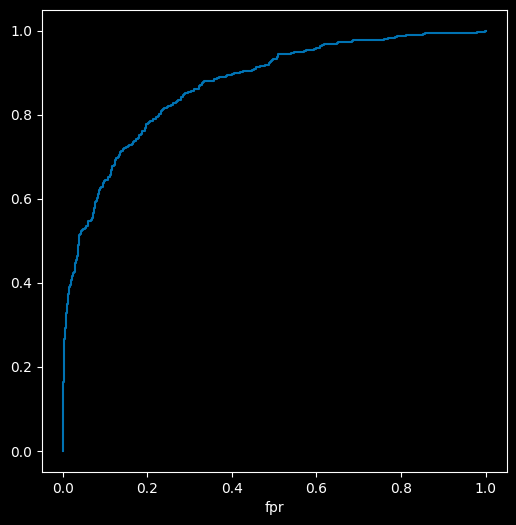

In [126]:
roc.set_index('fpr').tpr.plot(figsize=(6,6));

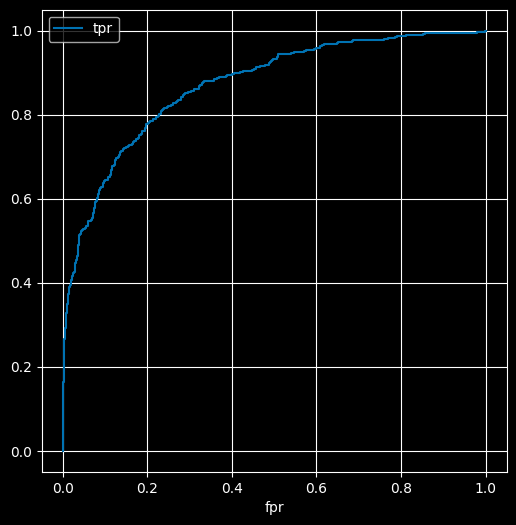

In [130]:
roc.plot(x='fpr', y='tpr', figsize=(6,6), grid=True);

In [131]:
roc['random'] = roc['fpr']

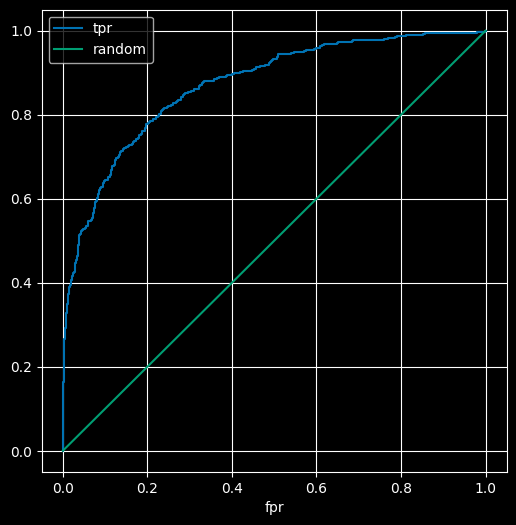

In [132]:
roc.plot(x='fpr', y=['tpr', 'random'], figsize=(6,6), grid=True);

In [133]:
roc['ideal'] = 1

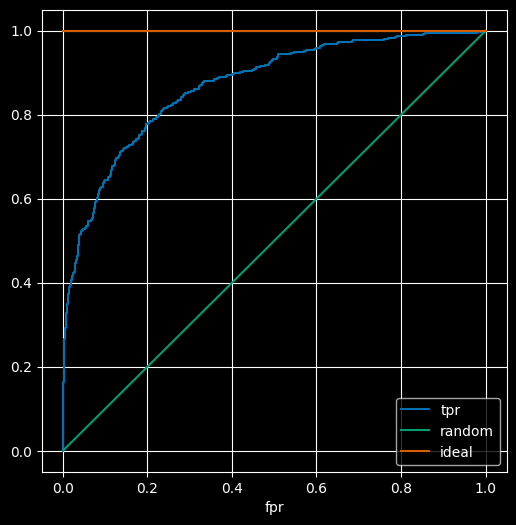

In [136]:
roc.plot(x='fpr', y=['tpr', 'random', 'ideal'], figsize=(6,6), grid=True);

Посмотрим на ROC со стаковерфлоу

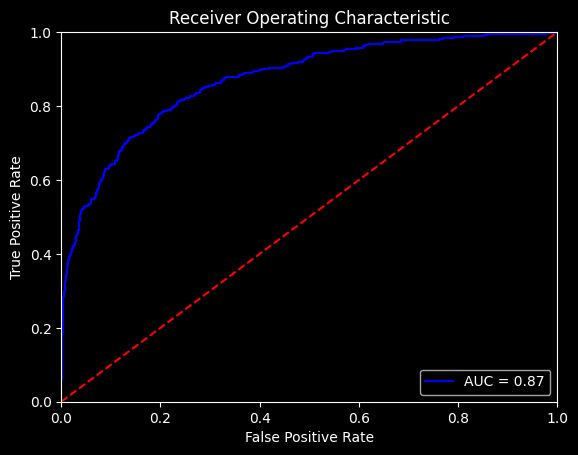

In [137]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(test.Exited, test.score_catboost)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [145]:
from catboost.utils import get_roc_curve

In [149]:
test_data = Pool(data=test[X],
                  label=test[y],
                  cat_features=cat_features
                  )

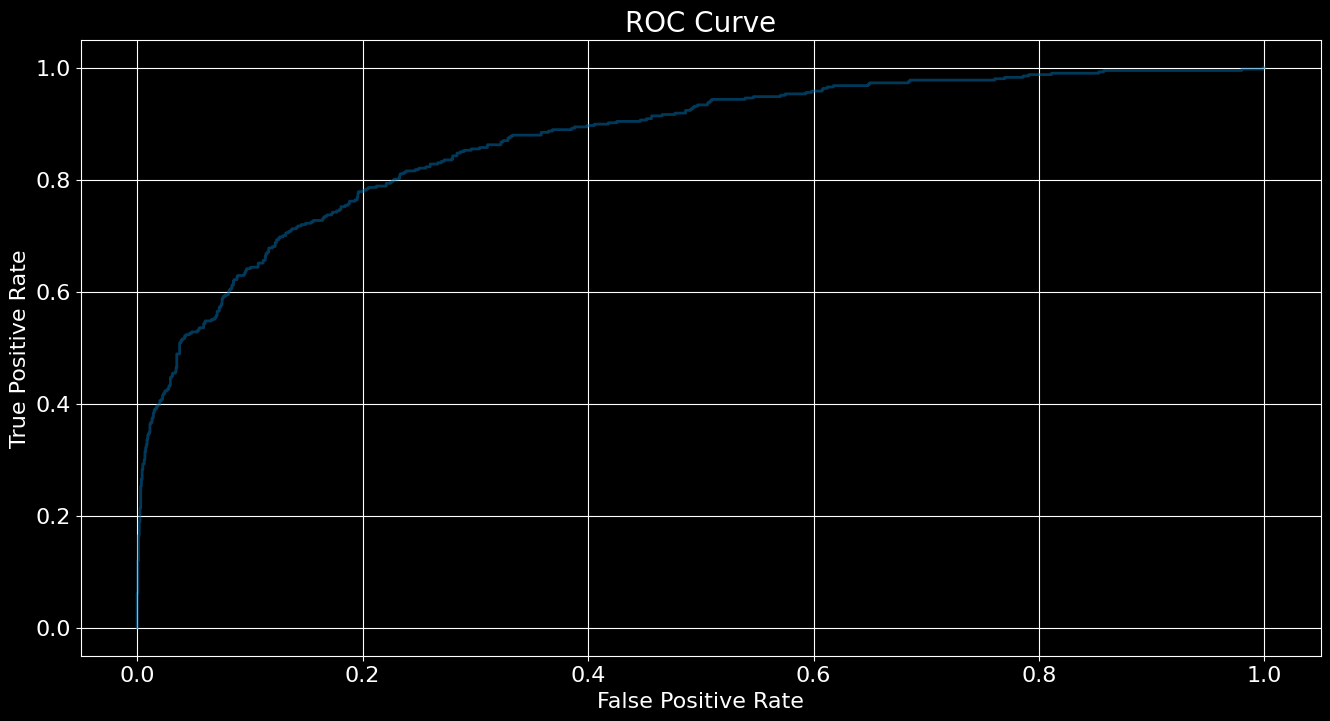

In [153]:
get_roc_curve(model, test_data, plot=True);

## AUC
Метрика показывает площадь под кривой ROC
Чем ближе площадь к 1-це, тем лучше модель

In [154]:
from sklearn.metrics import roc_auc_score

In [155]:
roc_auc_score(test.Exited, test.score_catboost)

0.8703063618317854

Для примера: можно поменять метрику по умолчанию logloss на auc при валидации модели

In [156]:
params = {'verbose': 100,
          'eval_metric': 'AUC',
          'random_seed': 42,
          'learning_rate': 0.01}

In [157]:
model = CatBoostClassifier(**params)

На валидации ROC получился 0.883, а на тесте 0.87

In [158]:
model.fit(train_data, eval_set=valid_data)

0:	test: 0.8338545	best: 0.8338545 (0)	total: 24.2ms	remaining: 24.1s
100:	test: 0.8725090	best: 0.8725090 (100)	total: 2.73s	remaining: 24.3s
200:	test: 0.8784656	best: 0.8784656 (200)	total: 5.4s	remaining: 21.5s
300:	test: 0.8812676	best: 0.8812676 (300)	total: 7.96s	remaining: 18.5s
400:	test: 0.8823868	best: 0.8824376 (390)	total: 10.3s	remaining: 15.4s
500:	test: 0.8834491	best: 0.8834522 (498)	total: 13.1s	remaining: 13.1s
600:	test: 0.8834737	best: 0.8836554 (564)	total: 15.9s	remaining: 10.6s
700:	test: 0.8837847	best: 0.8838694 (685)	total: 18.9s	remaining: 8.06s
800:	test: 0.8834383	best: 0.8838694 (685)	total: 21.9s	remaining: 5.45s
900:	test: 0.8829318	best: 0.8838694 (685)	total: 24.7s	remaining: 2.72s
999:	test: 0.8822744	best: 0.8838694 (685)	total: 27.3s	remaining: 0us

bestTest = 0.8838694083
bestIteration = 685

Shrink model to first 686 iterations.


## ROC AUC при сильно несбалансированных классах

Для примера создадим ДФ, где будет 990 нулей и 10 единиц, то есть сильно несбалансированный ДС

In [159]:
t = pd.DataFrame({'y_true': [0]*990 + [1]*10})

In [160]:
t

,y_true
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,1
997,1
998,1


In [161]:
t.y_true.mean()

0.01

In [162]:
import numpy as np

In [165]:
np.random.uniform(0, 0.2)

0.17641866723982547

In [166]:
np.random.uniform(0.8, 1)

0.8895649509209933

In [168]:
np.concatenate([np.random.uniform(0, 0.2, size=2),np.random.uniform(0.8, 1, size=3)])

array([0.10336875, 0.07646484, 0.89687779, 0.85657748, 0.92513076])

Создадим искуственный ДФ с 970 нулями и 30 1-ами.
Добавим в них шум

In [180]:
t = pd.DataFrame({'y_true': [0]*990 + [1]*10})

In [186]:
np.random.seed(42)
t['y_score1'] = np.concatenate([np.random.uniform(0, 0.2, size=970),
                                np.random.uniform(0.8, 1, size=20),
                                np.random.uniform(0, 0.2, size=5),
                                np.random.uniform(0.8, 1, size=5)])

In [187]:
t.head()

,y_true,y_score1
0,0,0.074908
1,0,0.190143
2,0,0.146399
3,0,0.119732
4,0,0.031204


In [188]:
roc_auc_score(t.y_true, t.y_score1)

0.7664646464646465

Создадим ещё 1 скор

In [189]:
np.random.seed(42)
t['y_score2'] = np.concatenate([np.random.uniform(0, 0.2, size=930),
                                np.random.uniform(0.8, 1, size=60),
                                np.random.uniform(0, 0.2, size=2),
                                np.random.uniform(0.8, 1, size=8)])

In [190]:
roc_auc_score(t.y_true, t.y_score2)

0.9166666666666667

#### При сильно несбалансированных классах ROC перестаёт обращать внимание на FP